In [ ]:
# python 3.10.15
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import contextily as ctx
points_df = pd.read_csv('/Users/mihiarc/Work/data/HeirsParcels/nc-plots.csv')
block_groups = gpd.read_file('/Users/mihiarc/Work/data/spatial-boundaries/cb_2023_us_bg_500k/cb_2023_us_bg_500k.shp')
metro_areas = gpd.read_file('/Users/mihiarc/Work/data/spatial-boundaries/tl_2020_us_cbsa/tl_2020_us_cbsa.shp')
counties = gpd.read_file('/Users/mihiarc/Work/data/spatial-boundaries/tl_2023_us_county/tl_2023_us_county.shp')
parcels_nc = gpd.read_parquet('/Users/mihiarc/Work/data/HeirsParcels/nc-parcels.parquet')
parcels_hp = gpd.read_parquet('/Users/mihiarc/Work/data/HeirsParcels/nc-hp_v2.parquet')

In [ ]:
# # check crs
# print('Census crs:', block_groups.crs)
# print('county crs:', counties.crs)
# print('Parcels crs:', parcels_nc.crs)
# print('Heirs Parcels crs:', parcels_hp.crs)

### Sample counties

Here I've plotted the FIA plots over the parcel boundaries for three sample counties. The challenge is spatially linking the ground level data to nearby parcels because we do not observe forest condition at each parcel. The hypothesis is that forest characteristics differ between heirs and non-heirs parcels. 

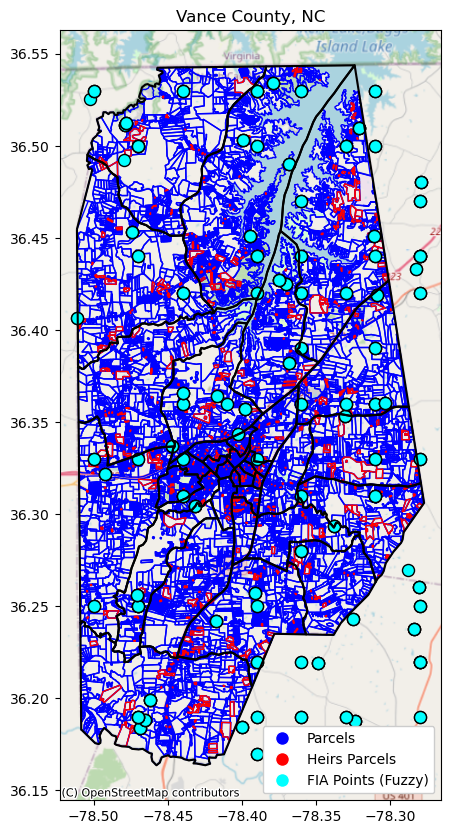

In [29]:
# clip test case by census block group
vance_parcels = parcels_nc[parcels_nc['FIPS'] == '37181'] # Vance county NC
vance_hp = parcels_hp[parcels_hp['FIPS'] == '37181']
vance_cnty = counties[counties['GEOID'] == '37181']
vance_block1 = block_groups[(block_groups['COUNTYFP'] == '181') &
                             (block_groups['STATEFP'] == '37')]
fia_pts = [Point(xy) for xy in zip(points_df['LON'], points_df['LAT'])]
vance_block1_parcels = gpd.clip(vance_parcels, vance_block1)
vance_block1_hp = gpd.clip(parcels_hp, vance_block1)
vance_block1_bbox = vance_block1.total_bounds
fia_gdf = gpd.GeoDataFrame(points_df, crs='EPSG:4269', geometry=fia_pts)
fia_gdf = gpd.clip(fia_gdf, vance_block1_bbox)
fig, ax = plt.subplots(figsize=(10, 10))
vance_block1_parcels.plot(ax=ax, color='none', edgecolor='blue')
vance_block1_hp.plot(ax=ax, color='none', edgecolor='red')
vance_block1.boundary.plot(ax=ax, color='black')
# vance_cnty.boundary.plot(ax=ax, color='black')
fia_gdf.plot(ax=ax, color='cyan', markersize=75, edgecolor='black')
ctx.add_basemap(ax, crs=vance_cnty.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)
# add title
plt.title('Vance County, NC')
# add legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Parcels')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Heirs Parcels')
cyan_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='cyan', markersize=10, label='FIA Points (Fuzzy)')
# reduce legend transparency
plt.legend(handles=[blue_patch, red_patch, cyan_patch], loc='lower right', framealpha=1)
plt.show()

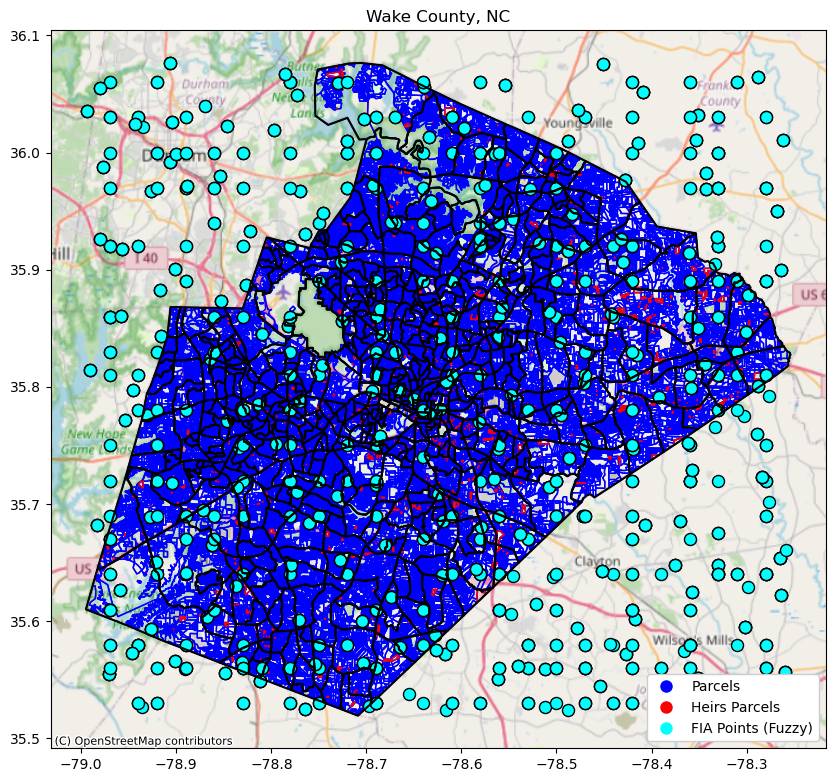

In [30]:
# clip test case by census block group
county_parcels = parcels_nc[parcels_nc['FIPS'] == '37183'] # wake county NC
county_hp = parcels_hp[parcels_hp['FIPS'] == '37183']
county = counties[counties['GEOID'] == '37183']
county_block1 = block_groups[(block_groups['COUNTYFP'] == '183') &
                             (block_groups['STATEFP'] == '37')]
fia_pts = [Point(xy) for xy in zip(points_df['LON'], points_df['LAT'])]
county_block1_parcels = gpd.clip(county_parcels, county_block1)
county_block1_hp = gpd.clip(parcels_hp, county_block1)
county_block1_bbox = county_block1.total_bounds
fia_gdf = gpd.GeoDataFrame(points_df, crs='EPSG:4269', geometry=fia_pts)
fia_gdf = gpd.clip(fia_gdf, county_block1_bbox)
fig, ax = plt.subplots(figsize=(10, 10))
county_block1_parcels.plot(ax=ax, color='none', edgecolor='blue')
county_block1_hp.plot(ax=ax, color='none', edgecolor='red')
county_block1.boundary.plot(ax=ax, color='black')
fia_gdf.plot(ax=ax, color='cyan', markersize=75, edgecolor='black')
ctx.add_basemap(ax, crs=county.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)
# add title
plt.title('Wake County, NC')
# add legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Parcels')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Heirs Parcels')
cyan_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='cyan', markersize=10, label='FIA Points (Fuzzy)')
# reduce legend transparency
plt.legend(handles=[blue_patch, red_patch, cyan_patch], loc='lower right', framealpha=1)
plt.show()

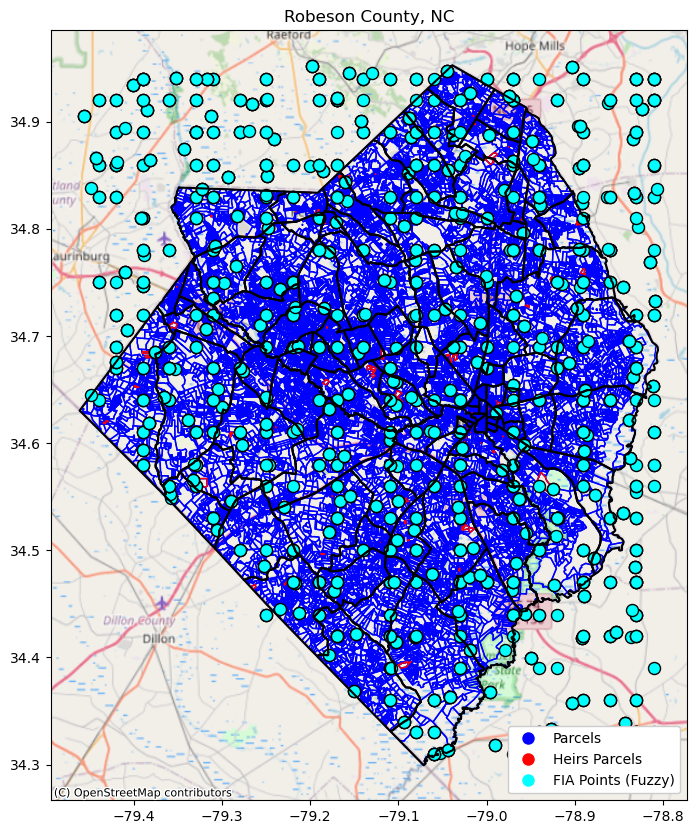

In [31]:
# clip test case by census block group
county_parcels = parcels_nc[parcels_nc['FIPS'] == '37155'] # Robeson county NC
county_hp = parcels_hp[parcels_hp['FIPS'] == '37155']
county = counties[counties['GEOID'] == '37155']
county_block1 = block_groups[(block_groups['COUNTYFP'] == '155') &
                             (block_groups['STATEFP'] == '37')]
fia_pts = [Point(xy) for xy in zip(points_df['LON'], points_df['LAT'])]
county_block1_parcels = gpd.clip(county_parcels, county_block1)
county_block1_hp = gpd.clip(parcels_hp, county_block1)
county_block1_bbox = county_block1.total_bounds
fia_gdf = gpd.GeoDataFrame(points_df, crs='EPSG:4269', geometry=fia_pts)
fia_gdf = gpd.clip(fia_gdf, county_block1_bbox)
fig, ax = plt.subplots(figsize=(10, 10))
county_block1_parcels.plot(ax=ax, color='none', edgecolor='blue')
county_block1_hp.plot(ax=ax, color='none', edgecolor='red')
county_block1.boundary.plot(ax=ax, color='black')
fia_gdf.plot(ax=ax, color='cyan', markersize=75, edgecolor='black')
ctx.add_basemap(ax, crs=vance_cnty.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Parcels')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Heirs Parcels')
cyan_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='cyan', markersize=10, label='FIA Points (Fuzzy)')
plt.legend(handles=[blue_patch, red_patch, cyan_patch], loc='lower right', framealpha=1)
plt.title('Robeson County, NC')
plt.show()

### Distribution of Parcel Size

In [20]:
parcels_nc = gpd.read_parquet('/Users/mihiarc/Work/data/HeirsParcels/nc-parcels.parquet')
parcels_nc = parcels_nc.to_crs(epsg=32119)
# convert square meters to acres
parcels_nc['area_acres'] = parcels_nc['geometry'].area * 0.000247105
print('All NC Parcels -- Full Distribution of Parcel Size: ', parcels_nc['area_acres'].describe())
# calculate the interquartile range
q1 = parcels_nc['area_acres'].quantile(0.25)
q3 = parcels_nc['area_acres'].quantile(0.75)
parcels_nc = parcels_nc[(parcels_nc['area_acres'] > q1) &
                         (parcels_nc['area_acres'] < q3)]
print('All NC Parcels -- IQR Distribution of Parcel Size: ', parcels_nc['area_acres'].describe())

All NC Parcels -- Full Distribution of Parcel Size:  count    5.556642e+06
mean     5.553605e+00
std      1.698908e+02
min      1.129790e-09
25%      2.625393e-01
50%      5.455099e-01
75%      1.550997e+00
max      2.183674e+05
Name: area_acres, dtype: float64
All NC Parcels -- IQR Distribution of Parcel Size:  count    2.778320e+06
mean     6.547169e-01
std      3.249798e-01
min      2.625394e-01
25%      3.891674e-01
50%      5.455099e-01
75%      8.939343e-01
max      1.550996e+00
Name: area_acres, dtype: float64


In [21]:
parcels_hp = gpd.read_parquet('/Users/mihiarc/Work/data/HeirsParcels/nc-hp_v2.parquet')
parcels_hp = parcels_hp.to_crs(epsg=32119)
# convert square meters to acres
parcels_hp['area_acres'] = parcels_hp['geometry'].area * 0.000247105
print('Heirs Property Only -- Full Distribution of Parcel Size: ', parcels_hp['area_acres'].describe())
# Calculate the 20th and 80th percentiles
lower_bound = parcels_hp['area_acres'].quantile(0.25)
upper_bound = parcels_hp['area_acres'].quantile(0.75)
# Filter the parcels
parcels_hp = parcels_hp[(parcels_hp['area_acres'] >= lower_bound) &
                         (parcels_hp['area_acres'] <= upper_bound)]
print('Heirs Property Only -- IQR Distribution of Parcel Size: ', parcels_hp['area_acres'].describe())

Heirs Property Only -- Full Distribution of Parcel Size:  count    24349.000000
mean         7.488123
std         33.148785
min          0.000421
25%          0.284053
50%          0.727690
75%          3.368884
max       3058.673332
Name: area_acres, dtype: float64
Heirs Property Only -- IQR Distribution of Parcel Size:  count    12175.000000
mean         1.002838
std          0.734633
min          0.284053
25%          0.461014
50%          0.727690
75%          1.286499
max          3.368884
Name: area_acres, dtype: float64


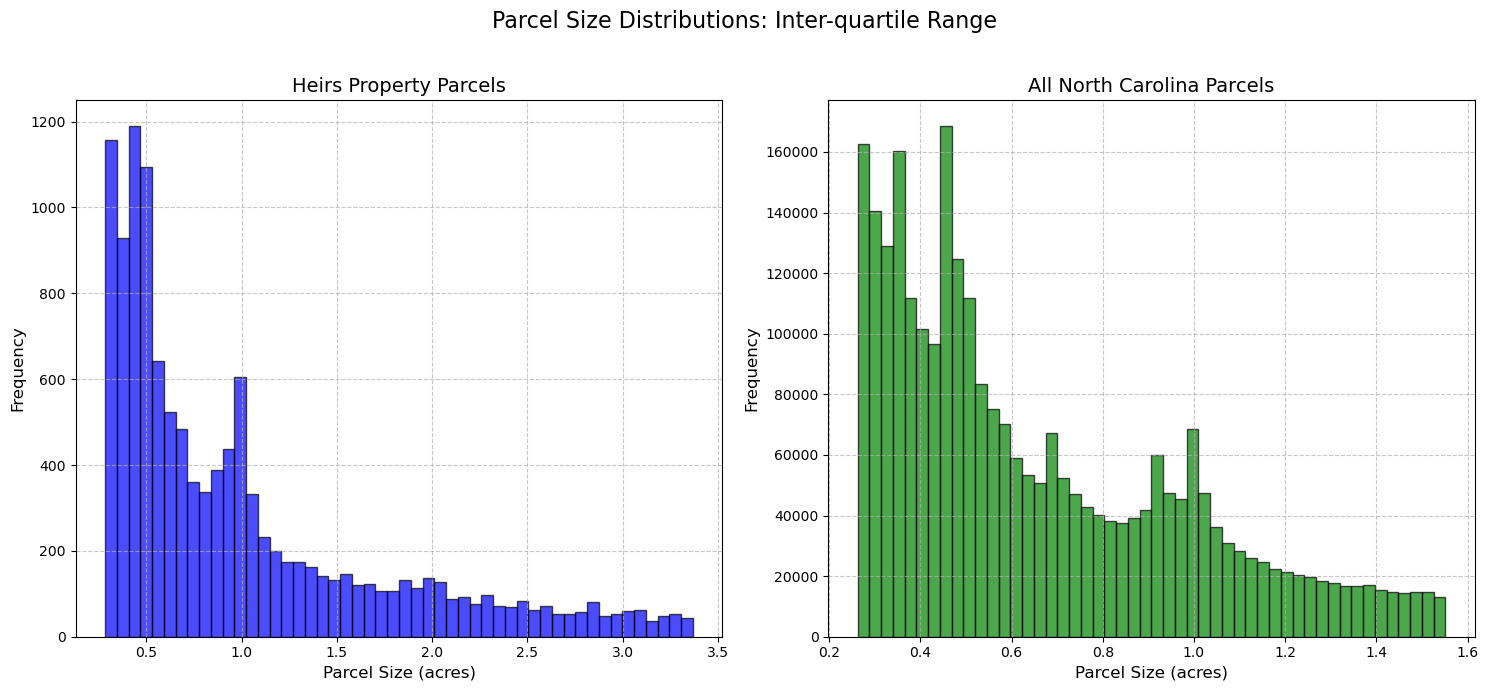

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot for parcels_hp
parcels_hp['area_acres'].plot(kind='hist', bins=50, ax=ax[0], color='blue', alpha=0.7, edgecolor='black')
ax[0].set_title('Heirs Property Parcels', fontsize=14)
ax[0].set_xlabel('Parcel Size (acres)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Plot for parcels_nc
parcels_nc['area_acres'].plot(kind='hist', bins=50, ax=ax[1], color='green', alpha=0.7, edgecolor='black')
ax[1].set_title('All North Carolina Parcels', fontsize=14)
ax[1].set_xlabel('Parcel Size (acres)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)

# Add a common title for the entire figure
fig.suptitle('Parcel Size Distributions: Inter-quartile Range', fontsize=16)

# Adjust layout to make room for the common title
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## Selecting forested heirs property parcels with Google Earth Engine

### Forest cover from the Tree Canopy Cover NLCD data

In this example, I have set a pixel level threshold of 30% tree cover. The original TCC band has the full range of coverage, so that we can test alternative thresholds in our definition of forested land. 

In [ ]:
import ee
import geemap

# Initialize the Earth Engine module.
ee.Initialize()

# Define the region of interest (North Carolina).
nc = ee.FeatureCollection("TIGER/2018/States").filter(ee.Filter.eq('NAME', 'North Carolina'))

# Load the most current NLCD land cover data.
tcc = ee.ImageCollection("USGS/NLCD_RELEASES/2021_REL/TCC/v2021-4").filter(ee.Filter.calendarRange(2021, 2021,'year')) \
               .filter('study_area == "CONUS"')  \
               .first()


# Clip the image to the region of interest.
tcc_nc = tcc.clip(nc)

tcc_palette = [
    'CDA066',
    'D7C29E',
    'C2D096',
    'B7D692',
    'ADDD8E',
    '78C679',
    '5CB86B',
    '41AB5D',
    '39A156',
    '329750',
    '238443',
    '11763D',
    '006837',
    '004529'
  ]

# Visualize the result.
Map = geemap.Map()
Map.centerObject(nc, 7)
Map.addLayer(tcc.select('NLCD_Percent_Tree_Canopy_Cover').gt(30),
             {min: 0, max: 60, 'palette': tcc_palette},
              'NLCD Percent Tree Canopy Cover > 50%')
Map.addLayer(nc.style(**{'color': '000000', 'fillColor': '00000000'}), {}, 'North Carolina Border')
Map.addLayerControl()
Map

Map(center=[35.540057765190284, -79.12928938818963], controls=(WidgetControl(options=['position', 'transparent…

### Export forest cover mask for local use

In [ ]:
# save image for reproducing results
# Define the image to be saved
# nc_tcc_30 = tcc.select('NLCD_Percent_Tree_Canopy_Cover').gt(30)
# projection = tcc.projection().getInfo()
# # Export the image, specifying the CRS, transform, and region.
# task = ee.batch.Export.image.toDrive(
#     image=nc_tcc_30,
#     description='tcc30percent',
#     crs=projection['wkt'],
#     folder='EarthEngineImages',
#     crsTransform=projection['transform'],
#     region=nc.geometry().bounds().getInfo()['coordinates'],
#     maxPixels=1e13
# )
# task.start()

#### Next steps

I've started working on the code to filter our parcels based on forest cover. Code is a work in progress. May to too large a job to run in one chunk, so I'll look into parallelizing it after we discuss our definition of forested parcel. 

In [ ]:
# import ee
# import geopandas as gpd
# from shapely.geometry import mapping

# # Initialize the Earth Engine API
# ee.Initialize()
# nc = ee.FeatureCollection("TIGER/2018/States").filter(ee.Filter.eq('NAME', 'North Carolina'))
# nc_tcc = ee.ImageCollection("USGS/NLCD_RELEASES/2021_REL/TCC/v2021-4").filter(ee.Filter.calendarRange(2021, 2021,'year')) \
#                .filter('study_area == "CONUS"')  \
#                .first().select('NLCD_Percent_Tree_Canopy_Cover')
# nc_tcc_30 = nc_tcc.gt(30)

# parcels_hp = gpd.read_parquet('/Users/mihiarc/Work/data/HeirsParcels/nc-hp_v2.parquet')
# parcels_hp = parcels_hp.to_crs(epsg=32119)
# # Convert the GeoDataFrame to an Earth Engine FeatureCollection
# def geodataframe_to_ee(gdf):
#     features = []
#     for _, row in gdf.iterrows():
#         geom = mapping(row['geometry'])
#         prop = row.drop('geometry').to_dict()
#         ee_feat = ee.Feature(geom, prop)
#         features.append(ee_feat)
#     return ee.FeatureCollection(features)

# ee_parcels = geodataframe_to_ee(parcels_hp)
# # Function to calculate mean tree canopy cover for each parcel
# def add_mean_tcc(feature):
#     mean_dict = nc_tcc_30.reduceRegion(
#         reducer=ee.Reducer.mean(),
#         geometry=feature.geometry(),
#         scale=30,
#         maxPixels=1e13
#     )
#     mean_tcc = mean_dict.get('TCC')
#     return feature.set({'mean_tcc': mean_tcc})

# # Map the function over the parcels
# parcels_with_tcc = ee_parcels.map(add_mean_tcc)

# # Filter out parcels with mean_tcc <= 0
# parcels_with_forest = parcels_with_tcc.filter(ee.Filter.gt('mean_tcc', 0))

# # Convert the filtered FeatureCollection back to a GeoDataFrame
# def ee_fc_to_geopandas(fc):
#     # Get the list of features as dictionaries
#     features = fc.getInfo()['features']
#     # Convert to GeoDataFrame
#     gdf = gpd.GeoDataFrame.from_features(features)
#     return gdf

# hp_parcels_with_forest = ee_fc_to_geopandas(parcels_with_forest)

### Alternative Method (Local processing)

In [4]:
# import rasterio
# import geopandas as gpd
# from rasterio.mask import mask
# parcels_nc = gpd.read_parquet('/Users/mihiarc/Work/data/HeirsParcels/nc-parcels.parquet')
# parcels_nc = parcels_nc.to_crs(epsg=32119)

# # Path to your local GeoTIFF image
# tcc_image_path = '/Users/mihiarc/Work/data/HeirsParcels/tcc30percent.tif'  # Replace with your file path

# # Open the raster file
# with rasterio.open(tcc_image_path) as src:
#     raster_crs = src.crs

#     # Reproject parcels to match the raster CRS if necessary
#     if parcels_nc.crs != raster_crs:
#         parcels_nc = parcels_nc.to_crs(raster_crs)

#     # Initialize a list to store mean TCC values
#     mean_tcc_list = []

    # # Iterate over each parcel geometry
    # for geom in parcels_nc.geometry:
    #     try:
    #         # Mask the raster with the parcel geometry
    #         out_image, out_transform = rasterio.mask.mask(src, [geom], crop=True)
    #         out_image = out_image[0]  # Assuming the raster has a single band

    #         # Flatten the array and remove nodata values
    #         out_image = out_image.flatten()
    #         out_image = out_image[out_image != src.nodata]

    #         # Calculate the mean TCC
    #         if out_image.size > 0:
    #             mean_tcc = out_image.mean()
    #         else:
    #             mean_tcc = 0
    #     except Exception as e:
    #         mean_tcc = 0
    #         print(f"Error processing geometry: {e}")

    #     mean_tcc_list.append(mean_tcc)

# # Add the mean TCC values to the GeoDataFrame
# parcels_nc['mean_tcc'] = mean_tcc_list

# # Filter out parcels with mean_tcc <= 0
# parcels_with_forest = parcels_nc[parcels_nc['mean_tcc'] > 0]

# # Now 'parcels_with_forest' contains only parcels with forest cover

### Bounding box method

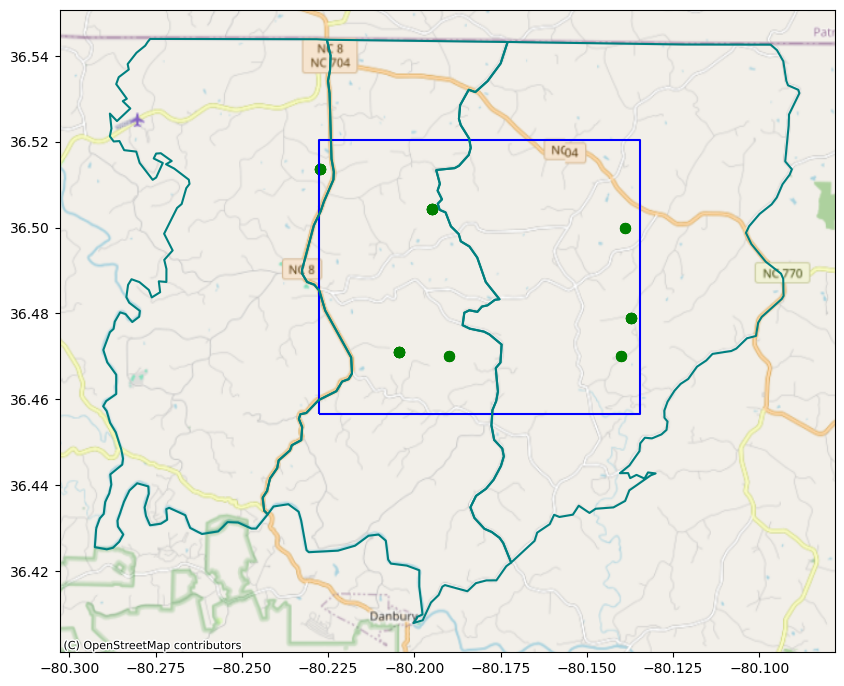

In [9]:
# fig, ax = plt.subplots(figsize=(10, 10))
# # Plot parcels within AOI
# # select parcels in the census polygon
# # parcels.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)
# # Plot the bounding box
# bbox.boundary.plot(ax=ax, color='blue')
# # Plot the points
# points_gdf.plot(ax=ax, color='green', markersize=50)
# # Plot the census block groups
# gdf_nc.boundary.plot(ax=ax, color='teal')
# # basemap
# ctx.add_basemap(ax, crs=gdf_nc.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
# plt.show()